In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

In [3]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
_, (test_images, _) = fashion_mnist.load_data()

In [6]:
test_image = np.expand_dims(test_images[0], axis=0).astype(np.float32)
#test_image = np.array([test_images[0]/256.], dtype=np.float32)

In [7]:
interpreter.set_tensor(input_details[0]['index'], test_image)
interpreter.invoke()
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[-2157.3533  -4203.5986  -3161.6448  -4569.282   -3135.6277  -1033.4221
  -2726.2156   -163.54839 -2354.1855   1970.0905 ]]


In [8]:
np.sum(output_data)

-21534.787

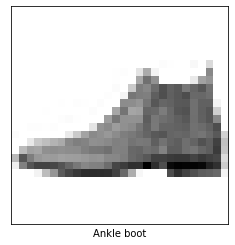

In [9]:
plt.figure()
plt.imshow(test_image[0], cmap=plt.cm.binary)
predicted_label = np.argmax(output_data)
plt.xlabel(class_names[predicted_label])
plt.xticks([])
plt.yticks([])
plt.show()

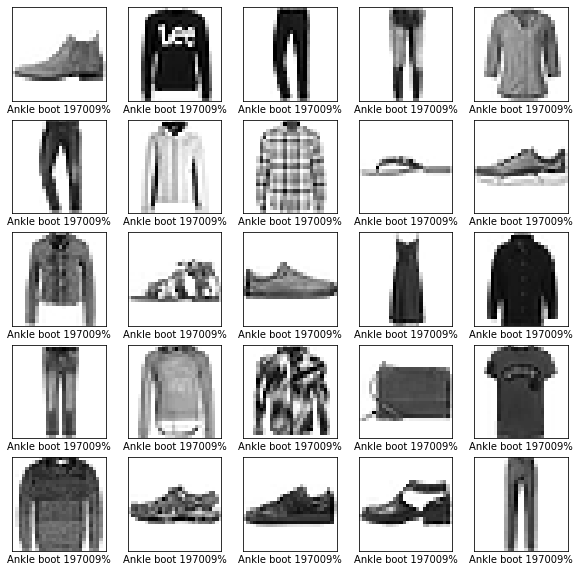

In [10]:
plt.figure(figsize=(10,10))
items=25
for i in range(items):
    
    test_image = np.expand_dims(test_images[0], axis=0).astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], test_image)
    interpreter.invoke()
    # The function `get_tensor()` returns a copy of the tensor data.
    # Use `tensor()` in order to get a pointer to the tensor.
    predictions_array = interpreter.get_tensor(output_details[0]['index'])
    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    predicted_label = np.argmax(predictions_array)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    
    plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
                                100*np.max(predictions_array))) # FIXME: calculate percentage
plt.show()